## Line of Best Fit Assignment
This assignment walks through the creation of a line of best fit using real data.

This notebook was heavily inspired by [Gilbert Strang's lecture 16](https://www.youtube.com/watch?v=osh80YCg_GM&list=PL702104147583D7DA&index=16) (we use his 3 point regression example verbatim).

## Line of Best Fit Example

The following is a very small example that fits some points as well as possible with a line of the form $y = mx + b$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter([1, 2, 3], [1, 2, 2])

We'd like to fit a model of the form $y = mx + b$.  If we can make one line through all the points above, then we've solved:

$$ b + m (1) = (1) \\
b + m (2) = (2) \\
b + m (3) = (2)$$

Which is equivalent to:

$$ \begin{bmatrix}  1 & 1 \\  1 & 2\\  1 & 3 \end{bmatrix} \begin{bmatrix} b \\ m \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \\ 2 \end{bmatrix}$$

This equation is the familiar $A\vec{x} = \vec{y}$ for $A =  \begin{bmatrix}  1 & 1 \\  1 & 2\\  1 & 3 \end{bmatrix}$ and $\vec{y} = \begin{bmatrix} 1 \\ 2 \\ 2 \end{bmatrix}$.  By inspecting this equation, we can see that there isn't a solution.  Instead of giving up, what if we found some $\vec{p}$ which is close to $\vec{y}$ for which $A\vec{x} = \vec{p}$ is solvable (see two bullet point conditions above).  Similar to the projection above, we know that the projection of $\vec{y}$ into the span of the columns of $A$ will do the trick: $\vec{p} = A(A^T A)^{-1}A^T \vec{y}$

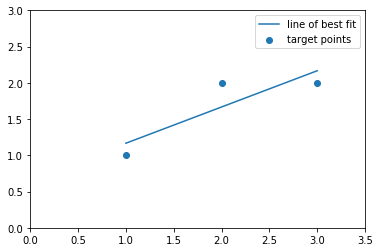

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

A = np.array([[1, 1],
              [1, 2],
              [1, 3]])

y = np.array([[1],
              [2],
              [2]])

p = A @ np.linalg.inv(A.T @ A) @ A.T @ y

# the A[:, 1] indexes into A to grab only the first column
# see https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html
plt.scatter(A[:, 1], y[:, 0], label='target points')
plt.plot(A[:, 1], p[:, 0], label='line of best fit');
plt.xlim(0, 3.5)
plt.ylim(0, 3)
plt.legend();

and what if we're only interested in the line's parameters (its slope and intercept)?  Observe that:

$\begin{bmatrix} b \\ m \end{bmatrix} = (A^T  A)^{-1} A^T \vec{y}$

so that:

In [3]:
b,m = np.linalg.inv(A.T @ A) @ A.T @ y
print(b)
print(m)

[0.66666667]
[0.5]


In other words our best fit line has intercept $b = \frac{2}{3}$ and slope $m = \frac{1}{2}$.


## Lines of Best Fish

It may be more fun to take a look at a real dataset.  Not that we want to lean too heavily on one application, but we found a [great fish dataset](https://www.kaggle.com/aungpyaeap/fish-market) which serves this purpose.  There's a bit more software below which manages the dataset itself, but the core linear algebra is the same as above.  

### Loading Data

The `pd.read_csv('./fish_data.csv')` line below looks in the same directory as the `.ipynb` for `fish_data.csv`.  Make sure you've downloaded it and placed it in the appropriate directory so the data may be loaded.  (CSV
refers to "comma separated values," a common way of storing simple tables as text.  And Pandas is a popular Python library for data science.)

This first block of code just loads the data and prints a bit of it for us to examine.  Take a peek by opening the csv itself too.  We use the [`Counter` object](https://docs.python.org/3/library/collections.html) below to count the number of each type of fish in the dataset.

In [4]:
import pandas as pd
from collections import Counter

# fish_data.csv must be in same folder as this ipynb
df = pd.read_csv('./fish_data.csv')

print(df)
print(Counter(df['Species']))

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]
Counter({'Perch': 56, 'Bream': 35, 'Roach': 20, 'Pike': 17, 'Smelt': 14, 'Parkki': 11, 'Whitefish': 6})


### Part A (6 points)
Now let's build our line of best fit.  The function below is incomplete.  Fill in the three missing `your answer here` components.

In [5]:
def scatter_fit_fish(species, a_feat, b_feat, df):
    """ scatters fish data points, fits a straight line between them
    
    model:
    
    b = x0 + x1 * a
    
    Args:
        species (str): specifies which fish data to use ('Perch', 'Bream',
            'Roach', 'Pike', 'Smelt', 'Parkki' or 'Whitefish')
        a_feat (str): which feature to plot along x axis 
            (Weight  Length1  Length2  Length3   Height   Width)
        b_feat (str): which feature to plot along y axis
            (Weight  Length1  Length2  Length3   Height   Width)
        df (pd.DataFrame): the pandas dataframe which contains the data 
            from all fish (as loaded above)
            
    Returns:
        x (np.array): parameters of line of best fit (see model above)
    """
    # build a new datafrom from only those rows which describe species
    df_species = df[df['Species']== species]

    # build a2, b which correspond to a_feat and b_feat
    a2 = df_species[a_feat]
    b = df_species[b_feat]

    # build matrix corresponding to our linear model
    a1 = np.ones(a2.size)
    A = np.vstack((a1, a2)).T

    # find p, the projection of b into the column space of A
    p = A @ np.linalg.inv(A.T @ A) @ A.T @ b
    
    # find x, the parameters of the line
    x = np.linalg.inv(A.T @ A) @ A.T @ b

    # scatter the observed fish
    plt.scatter(a2, b, alpha=.5, label=species)
    
    # plot a line of the projection
    a2_domain = np.linspace(a2.min(), a2.max(), 100)
    plt.plot(a2_domain, x[0] + x[1] * a2_domain, alpha=.5, linewidth=3)
    
    # this implementation takes advantage of the fact that each call to 
    # plot or scatter cycles through the same set of colors.  So the first
    # call to scatter is blue and the first call to plot is blue (which is
    # important because they're the same fish species)
    
    # graph grooming
    plt.xlabel(a_feat)
    plt.ylabel(b_feat)
    plt.legend()

    # https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
    ax = plt.gca()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
    
    return x

We can use the function above to observe the relationship between any two features in the dataset.  For example, the code below will plot the relationship between Height and Weight for the three given fish.

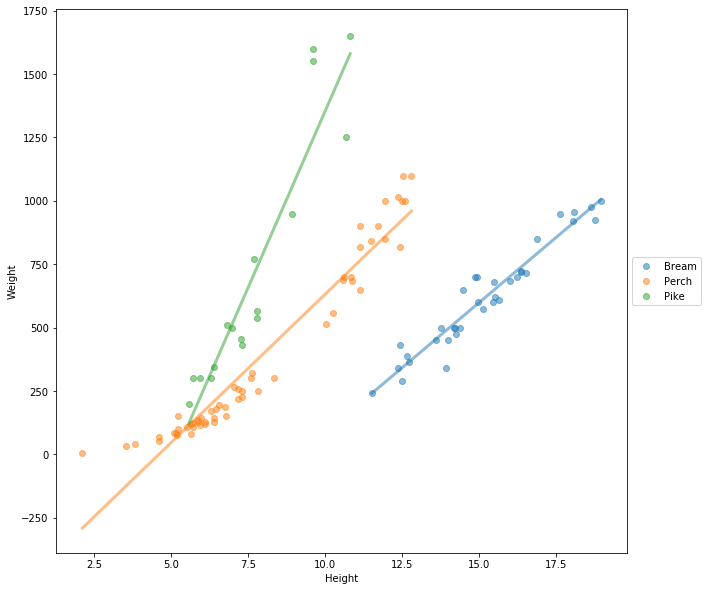

In [6]:
# define features of interest
a_feat = 'Height'
b_feat = 'Weight'

# figsize allows us to make a bigger image
plt.figure(figsize=[20, 10])
x_bream = scatter_fit_fish('Bream', a_feat, b_feat, df)
x_perch = scatter_fit_fish('Perch', a_feat, b_feat, df)
x_pike = scatter_fit_fish('Pike', a_feat, b_feat, df)

### Part B (2 points):
This line is useful for more than just describing the existing data, but can be used to predict unseen features of new fish.  Use your regressions to answer: how heavy is a typical perch whose height is 10?  How about the world record perch, whose height is 17.5 -- how heavy would you expect that fish to be?

In [7]:
weight_estimate10 = x_perch[0] + x_perch[1] * 10
print(weight_estimate10)

weight_estimate17 = x_perch[0] + x_perch[1] * 17.5
print(weight_estimate17)

632.3265792620169
1509.567153178375



### Part C (2 points):
Estimating the weight of a perch whose height is 10 is an example of **interpolation**.  The second weight estimate, from a perch whose height is 17.5, is an example of **extrapolation**.  Both are estimates of some unknown value based on a fitted line (or, in Machine-Learning-speak, a model).  The difference is that our model has been trained by utilizing fish whose heights are both smaller and larger than 10 ('inter' -> within our model's training data).  On the other hand, the world record perch is far taller than what our model has seen in training ('extra' -> outside of our model's training data).  [A graphical explanation](https://stats.stackexchange.com/questions/418803/extrapolation-v-interpolation/418814#418814) is helpful to illustrate the difference.

Which of the two estimates above, in Part B, would you expect to be closer to fish of the given height?  Why?

### Part C Solution:

We expect the interpolation (for `height=10`) to provide a more accurate estimate than the extrapolation (for `height=17.5`).  The model has had an opportunity to observe fish in and around `height=10`, to adapt to Perch of this size.  Without ever observing a Perch of `height=17.5`, our model is forced to assume that whatever linear trend continues across heights.  This assumption, especially in the case of Perch, looks pretty suspicious.  Observe that the line seems to be inadequate in describing how Perch height and weight are related.  (see below)

### Part D (4 points):
Notice that the straight line fit between the height (x axis) and weight (y axis) is a poor fit for perch.  We may do better to fit this relationship with an [exponential model](https://en.wikipedia.org/wiki/Exponential_function).  

Fill in each of the `your answer here too` strings below to re-cast this exponential model as a linear fit.  Note that the `your answer here` lines from above may be copied down to this new function without modification.

In [8]:
def scatter_fit_fish_exp(species, a_feat, b_feat, df):
    """ scatters fish data points, fits an exponential line between them
    
    model:
    
    b = x0 e^(x1 * a)
    
    Args:
        species (str): specifies which fish data to use ('Perch', 'Bream',
            'Roach', 'Pike', 'Smelt', 'Parkki' or 'Whitefish')
        a_feat (str): which feature to plot along x axis 
            (Weight  Length1  Length2  Length3   Height   Width)
        b_feat (str): which feature to plot along y axis
            (Weight  Length1  Length2  Length3   Height   Width)
        df (pd.DataFrame): the pandas dataframe which contains the data 
            from all fish (as loaded above)
            
    Returns:
        x (np.array): parameters of line of best fit (see model above)
    """
    # build a new datafrom from only those rows which describe species
    df_species = df[df['Species']== species]

    # build a2, b which correspond to a_feat and b_feat
    a2 = df_species[a_feat]
    b = df_species[b_feat]
    
    # cast your problem as a linear fit
    b =np.log(b) # this is log base e

    # build matrix corresponding to our linear model
    a1 = np.ones(a2.size)
    A = np.vstack((a1, a2)).T

    # find p, the projection of b into the column space of A
    p = A @ np.linalg.inv(A.T @ A) @ A.T @ b
    
    # find x, the parameters of the line
    x = np.linalg.inv(A.T @ A) @ A.T @ b
    
    # convert x and b back from 'log space' (for plotting)
    x = np.array([np.exp(x[0]), x[1]])
    # alternate: x[0] = np.exp(x[0])
    b = np.exp(b)

    # scatter the observed fish
    plt.scatter(a2, b, alpha=.5, label=species)
    
    # plot a line of the projection
    a2_domain = np.linspace(a2.min(), a2.max(), 100)
    plt.plot(a2_domain, x[0] * np.exp(x[1] * a2_domain), alpha=.5, linewidth=3)
    
    # this implementation takes advantage of the fact that each call to 
    # plot or scatter cycles through the same set of colors.  So the first
    # call to scatter is blue and the first call to plot is blue (which is
    # important because they're the same fish species)
    
    # graph grooming
    plt.xlabel(a_feat)
    plt.ylabel(b_feat)
    plt.legend()

    # https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
    ax = plt.gca()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
    
    return x

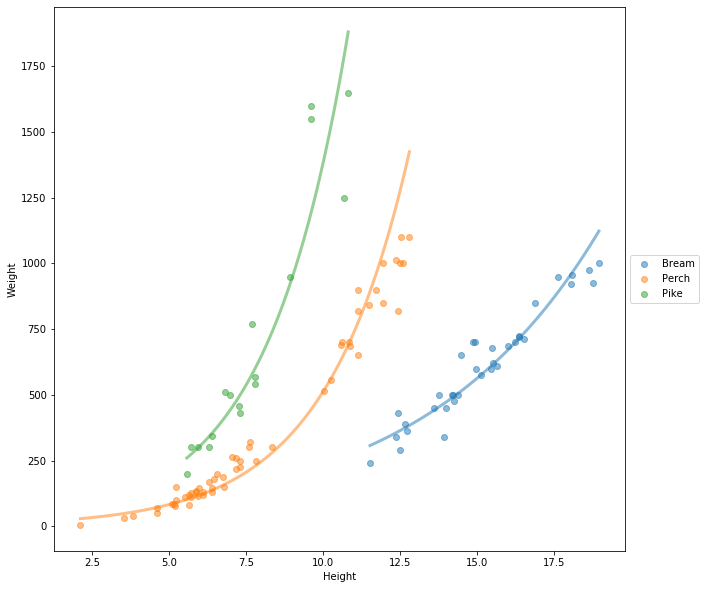

In [9]:
# define features of interest
a_feat = 'Height'
b_feat = 'Weight'

# figsize allows us to make a bigger image
plt.figure(figsize=[20, 10])
x_bream = scatter_fit_fish_exp('Bream', a_feat, b_feat, df)
x_perch = scatter_fit_fish_exp('Perch', a_feat, b_feat, df)
x_pike = scatter_fit_fish_exp('Pike', a_feat, b_feat, df)